In [34]:
# Import of standard python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from ipywidgets import interact
import lenstronomy.Util.constants as constants
import random
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
from lenstronomy.Cosmo.lens_cosmo import LensCosmo

In [35]:
#these are typical values used in a variety of places
H_0 = 70
omega_mm = 0.3
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.)

def function(z_l_frac,z_s,M_galaxy):
    
    z_l = z_l_frac*z_s
    
    M = 10**(M_galaxy)
    
    lensCosmo = LensCosmo(z_lens=z_l, z_source=z_s, cosmo=cosmo)
    d_ls = lensCosmo.dds*constants.Mpc
    d_l = lensCosmo.dd*constants.Mpc
    d_s = lensCosmo.ds*constants.Mpc
        
    tE = (1/constants.arcsec)*np.sqrt(4*constants.G*constants.M_sun*M*d_ls/(d_l*d_s*constants.c**2))    
    
    return(tE)


z_l_frac = np.linspace(0.01,1,1000)
theta_e = np.zeros(len(z_l_frac))

def plotting_function(z_lens_frac, z_s, M_galaxy, physical_radius):

    for i in range(len(z_l_frac)):
        theta_e[i] = function(z_l_frac[i],z_s,M_galaxy)
    
    z_lens = z_lens_frac*z_s
    lensCosmo2 = LensCosmo(z_lens= z_lens, z_source=z_s, cosmo=cosmo)
    r_sers = (physical_radius/lensCosmo2.ds)*(206265/10**6)
    print('')
    print("Sersic Radius = ", r_sers)
    
    theta_E = function(z_lens_frac,z_s,M_galaxy)
    print('')
    print("Einstein Radius = ", theta_E)
    
    plt.plot(z_l_frac*z_s,theta_e)
    plt.xlabel('Lens Redshift')
    plt.ylabel(r'$\theta_E$')
    plt.plot(z_lens_frac*z_s,theta_E,'rx',markersize=15)

    
interact(plotting_function, z_lens_frac = (0.05,0.95,0.05), z_s=(0.1,5,0.1), M_galaxy = (10,11,0.02),physical_radius=(1000,10000,1000))   


interactive(children=(FloatSlider(value=0.45, description='z_lens_frac', max=0.95, min=0.05, step=0.05), Float…

<function __main__.plotting_function(z_lens_frac, z_s, M_galaxy, physical_radius)>

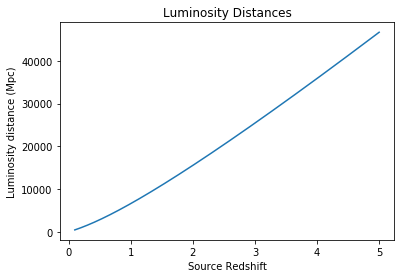

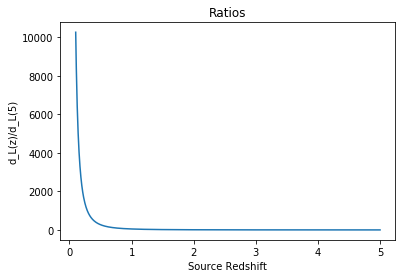

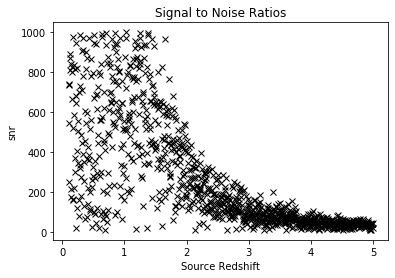

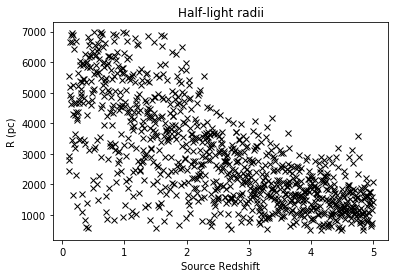

In [45]:
def Gauss_bounded(mu,sigma,lower,upper):
    
    acceptable = True
    
    while acceptable:
        value = random.gauss(mu, sigma)
        if value < upper and value > lower:
            acceptable = False
    
    return value

z_source_min = 0.1
z_source_max = 5

snr_min = 10      #the lowest acceptable value of the snr
snr_max = 10**3   #the highest acceptable value of the snr
snr_scale = 30    #this is the centre of the Gaussian distribution from which the snr is selected at max d_L
snr_sigma_frac = 0.3 #the standard distribution of the Gaussian, as a fraction of the mean

R_min = 500
R_max = 7000

z_sources = np.linspace(z_source_min,z_source_max,1000)

d_L_max = LensCosmo(z_lens=0.01, z_source=z_source_max, cosmo=cosmo).ds*(1+z_source_max)**2

d_Ls = np.zeros(len(z_sources))
ratios = np.zeros(len(z_sources))
snr = np.zeros(len(z_sources))
r_sers = np.zeros(len(z_sources))

for i in range(len(z_sources)):
    lensCosmo = LensCosmo(z_lens=0.01, z_source=z_sources[i], cosmo=cosmo)
    
    d_Ls[i] = (lensCosmo.ds*(1+z_sources[i])**2)
    
    ratios[i] = (d_L_max**2)*(d_Ls[i]**(-2))
    
    snr_mu = snr_scale*(d_L_max**2)*(lensCosmo.ds*(1+z_sources[i])**2)**(-2)
    
    snr_sigma = snr_mu*0.5
    
    snr[i] = Gauss_bounded(snr_mu, snr_sigma, snr_min, snr_max)    
    
    r_sers_start = 1500*cosmo.H(4)/cosmo.H(z_sources[i])
    
    r_sers_sigma = r_sers_start*0.5
    
    r_sers[i] = Gauss_bounded(r_sers_start,r_sers_sigma,R_min,R_max)
    
    
plt.figure(0)
plt.title("Luminosity Distances")
plt.xlabel("Source Redshift")
plt.ylabel("Luminosity distance (Mpc)")
plt.plot(z_sources,d_Ls)

plt.figure(1)
plt.title("Ratios")
plt.xlabel("Source Redshift")
plt.ylabel("d_L(z)/d_L(5)")
plt.plot(z_sources,ratios)

plt.figure(2)
plt.title("Signal to Noise Ratios")
plt.xlabel("Source Redshift")
plt.ylabel("snr")
plt.plot(z_sources,snr,'kx')


plt.figure(3)
plt.title("Half-light radii")
plt.xlabel("Source Redshift")
plt.ylabel("R (pc)")
plt.plot(z_sources,r_sers,'kx')